## MACHINE LEARNING Y REDES NEURONALES ##

In [ ]:
## Probar diferentes modelos de regresion de Machine Learning y modelos de regresion de redes neuronales como variable target
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,make_scorer, mean_absolute_error, mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
#---------------------------------------------------------------------
# Librerias de keras
from tensorflow import keras
from scikeras.wrappers import KerasRegressor 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from keras.optimizers import Adam
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Importar el dataset
df = pd.read_csv('datos_limpios.csv')

In [3]:
df

,id_extraccion,timestamp_extraccion,marca,titulo,precio_contado,financiacion_disponible,descuento,precio_final,ubicacion,kilometraje,...,latitud,longitud,transmision,tipo_carroceria,asientos,potencia,puertas,mes_matriculacion2,año_matriculacion2,garantia_limpia
0,https://www.autocasion.com/coches-segunda-mano...,2025-06-13 17:48:32.862597,ABARTH,ABARTH 500 C 695C 1.4 16v T-Jet 132kW (180 CV),22490.0,True,-0.04,21590.40,Madrid,23213.0,...,40.4168,-3.7038,Manual,Desconocido,0.0,179.0,2.0,12.0,2022.0,12
1,https://www.autocasion.com/coches-segunda-mano...,2025-06-13 17:48:32.863158,ABARTH,"ABARTH 500 1,4 Turbo",11799.0,True,-0.03,11445.03,Barcelona,100924.0,...,41.3851,2.1734,Manual,Desconocido,0.0,135.0,3.0,4.0,2015.0,12
2,https://www.autocasion.com/coches-segunda-mano...,2025-06-13 17:48:32.863594,ABARTH,ABARTH 124 SPIDER Spider Turbo Multiair 125kW...,22990.0,True,-0.04,22070.40,Barcelona,97814.0,...,41.3851,2.1734,Automático,Desconocido,2.0,170.0,2.0,12.0,2018.0,12
3,https://www.autocasion.com/coches-segunda-mano...,2025-06-13 17:48:32.863992,ABARTH,ABARTH 500 595 1.4T JET TURISMO 160,15990.0,True,0.00,15990.00,Alicante,36000.0,...,38.3452,-0.4810,Manual,Berlina,4.0,160.0,3.0,10.0,2016.0,12
4,https://www.autocasion.com/coches-segunda-mano...,2025-06-13 17:48:32.864370,ABARTH,ABARTH 500 500C 140 AUT.,13600.0,False,-0.07,12648.00,Vizcaya,145800.0,...,43.2630,-2.9349,Automático,Desconocido,4.0,140.0,2.0,7.0,2012.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109060,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-13 21:34:25.203449,YOOUDOOO,YOOUDOOO K3 70kW,19990.0,True,0.00,19990.00,Pontevedra,7361.0,...,42.4333,-8.6500,Automático,Todo Terreno,5.0,95.0,5.0,6.0,2024.0,24
109061,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-13 21:34:25.203631,YOOUDOOO,YOOUDOOO K3 70kW,21900.0,True,0.00,21900.00,Sevilla,3000.0,...,37.3891,-5.9845,Automático,Todo Terreno,5.0,95.0,5.0,7.0,2024.0,96
109062,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-13 21:34:25.203813,YOOUDOOO,YOOUDOOO K3 YUDO Pequeño Automático de 5 Puertas,26838.0,True,0.00,26838.00,Barcelona,10.0,...,41.3851,2.1734,Automático,Pequeño,5.0,95.0,5.0,8.0,2024.0,12
109063,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-13 21:34:25.204043,YOOUDOOO,YOOUDOOO K3 70kW,22990.0,True,0.00,22990.00,La Rioja,4585.0,...,42.4627,-2.4450,Automático,Todo Terreno,5.0,95.0,5.0,1.0,2025.0,84


In [4]:
df["precio_final"]

0         21590.40
1         11445.03
2         22070.40
3         15990.00
4         12648.00
            ...   
109060    19990.00
109061    21900.00
109062    26838.00
109063    22990.00
109064    21950.00
Name: precio_final, Length: 109065, dtype: float64

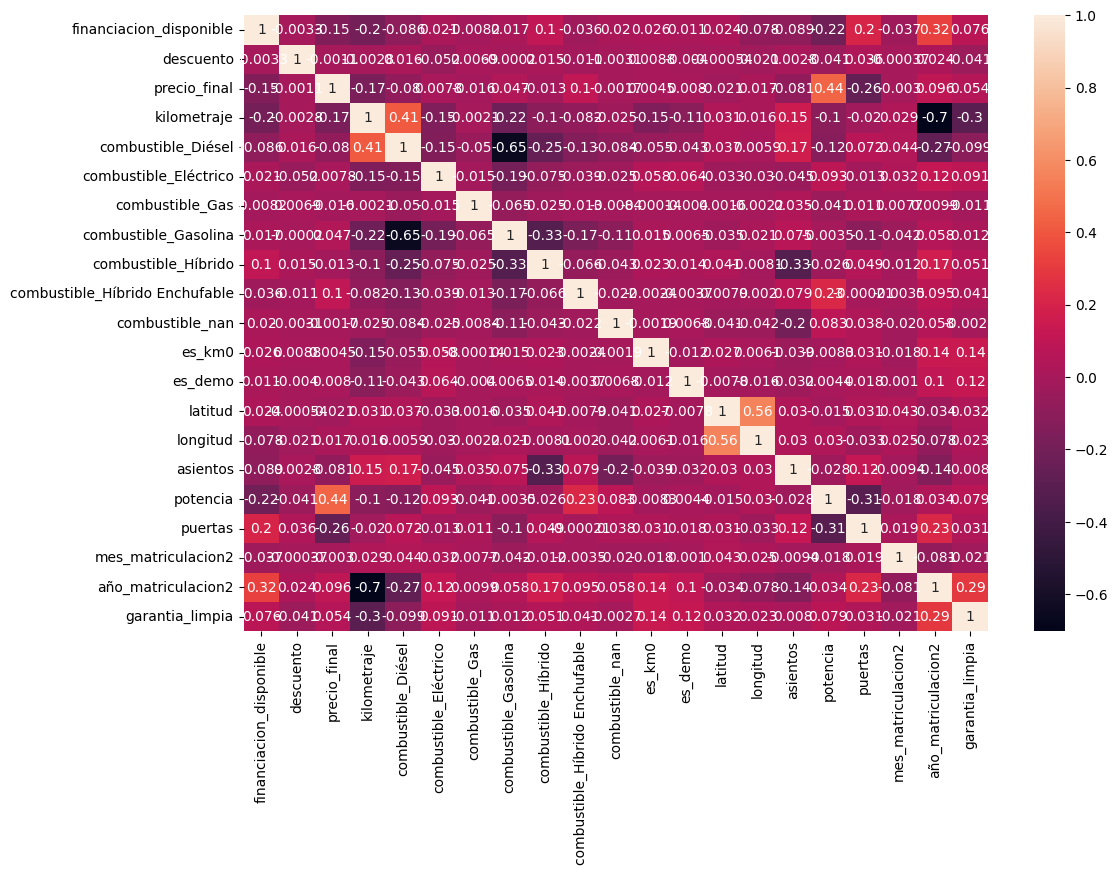

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df._get_numeric_data().iloc[:, 1:].corr(), annot=True)
plt.show()

In [ ]:
X = df.drop(columns=['precio_final'])
y = df['precio_final']
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['float64', 'int64', 'bool']).columns.tolist()
high_cardinality_cols = ['id_extraccion', 'titulo', 'timestamp_extraccion']
for col in high_cardinality_cols:
	if col in categorical_cols:
		categorical_cols.remove(col)
	if col in X.columns:
		X = X.drop(columns=[col])
categorical_cols = [col for col in categorical_cols if col in X.columns]
numeric_cols = [col for col in numeric_cols if col in X.columns]
preprocessor = ColumnTransformer(
	transformers=[
		('num', StandardScaler(), numeric_cols),
		('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
	]
)

X_processed = preprocessor.fit_transform(X)

correlacion = df.corr(numeric_only=True)[['precio_final']].sort_values('precio_final', ascending=False)
print(correlacion.head(10))
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


                                precio_final
precio_final                        1.000000
precio_contado                      0.997191
potencia                            0.443884
combustible_Híbrido Enchufable      0.103132
año_matriculacion2                  0.095903
garantia_limpia                     0.054156
combustible_Gasolina                0.046630
longitud                            0.017427
es_demo                             0.007979
combustible_Eléctrico               0.007776


In [7]:
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(x_train) 
X_test_scaled = X_scaler.transform(x_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))  
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

In [ ]:

from sklearn.metrics import mean_absolute_error

def evaluar_modelo(y_real, y_pred, modelo_nombre):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    
    print(f"\n Res {modelo_nombre}:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {np.sqrt(mse):.2f}")
    print(f"R²: {r2:.4f}")
    
    return {'MAE': mae, 'MSE': mse, 'R²': r2}

resultados = {}
modelos = {
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train_scaled.ravel())
    y_pred_scaled = modelo.predict(X_test_scaled)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_test_original = y_scaler.inverse_transform(y_test_scaled)
    resultados[nombre] = evaluar_modelo(y_test_original, y_pred, nombre)


 Res Random Forest:
MAE: 162.95
MSE: 101897933.62
RMSE: 10094.45
R²: 0.9859

 Res Gradient Boosting:
MAE: 496.77
MSE: 51068779.68
RMSE: 7146.24
R²: 0.9929

 Res KNN:
MAE: 5951.47
MSE: 291394878.05
RMSE: 17070.29
R²: 0.9597


In [ ]:
model = RandomForestRegressor().fit(x_train, y_train)
importances = model.feature_importances_

feature_names = preprocessor.get_feature_names_out()
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values('Importance', ascending=False)
print("\nImportancia de características ordenadas:")
print("="*40)
print(feature_importances.to_string(index=False)) 
print("="*40)
print("\nOtra presentación:")
for i, row in feature_importances.iterrows():
    print(f"{row['Feature']:20s}: {row['Importance']:.5f}")


Importancia de características ordenadas:
                            Feature   Importance
                num__precio_contado 9.898790e-01
                      num__potencia 2.468844e-03
                      num__asientos 1.264676e-03
                     num__descuento 1.072242e-03
            num__mes_matriculacion2 7.856483e-04
                 cat__marca_FERRARI 6.864946e-04
                   num__kilometraje 5.669664e-04
                      num__longitud 5.342269e-04
            num__año_matriculacion2 5.280038e-04
              cat__ubicacion_Murcia 4.333120e-04
          num__combustible_Gasolina 3.372810e-04
                       num__latitud 2.919687e-04
                 cat__marca_BUGATTI 2.063735e-04
                 cat__marca_PORSCHE 1.700060e-04
              cat__ubicacion_Madrid 1.617667e-04
            cat__marca_ASTON MARTIN 1.515556e-04
            cat__ubicacion_Alicante 6.978579e-05
                  cat__marca_PAGANI 6.152282e-05
        cat__transmision_A

In [10]:
#Comparacion de resultados
resultados_df = pd.DataFrame.from_dict(resultados, orient='index').reset_index()
resultados_df.columns = ['model_name', 'mae', 'mse', 'r2_score']
resultados_df = resultados_df.sort_values('r2_score', ascending=False).reset_index(drop=True)
resultados_df['mae'] = resultados_df['mae'].apply(lambda x: f"{x:.2f}")
resultados_df['mse'] = resultados_df['mse'].apply(lambda x: f"{x:.2f}")
resultados_df['r2_score'] = resultados_df['r2_score'].apply(lambda x: f"{x:.4f}")
resultados_df

,model_name,mae,mse,r2_score
0,Gradient Boosting,496.77,51068779.68,0.9929
1,Random Forest,162.95,101897933.62,0.9859
2,KNN,5951.47,291394878.05,0.9597


## Redes Neuronales

In [11]:
#Definimos las características y variables objetivo
x = df.drop(columns=["precio_final"] )
y= df["precio_final"]


# Primer Entrenamiento

In [12]:
x_train.shape 

(87252, 188)

In [13]:
# Definir un modelo simple de red neuronal para regresión
model = Sequential([
	Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
	Dropout(0.2),
	Dense(64, activation='relu'),
	Dense(1) 
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model.summary()

c:\Users\irina\Desktop\HACK A BOSS\Proyecto-\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        24,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,513 (127.00 KB)

 Trainable params: 32,513 (127.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Construcción del modelo
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Entrenamiento
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 6015499776.0000 - mae: 26342.7754 - val_loss: 5722850816.0000 - val_mae: 16310.7441
Epoch 2/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3459522304.0000 - mae: 15995.8223 - val_loss: 4949669376.0000 - val_mae: 16699.7773
Epoch 3/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4986941952.0000 - mae: 16705.0762 - val_loss: 4442550784.0000 - val_mae: 14377.3936
Epoch 4/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3774379520.0000 - mae: 13642.1777 - val_loss: 3931820800.0000 - val_mae: 11377.1494
Epoch 5/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2436491008.0000 - mae: 10825.7227 - val_loss: 3383814912.0000 - val_mae: 9841.2979
Epoch 6/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2400995072.0000 - mae: 9356.6738 - val_loss: 2966981888.0000 - val_mae: 8278.8633
Epoch 7/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2011470848.0000 - mae: 7728.5063 - val_loss: 2500578304.0000 - va

# Segundo Entrenamiento

In [15]:
#Normalizacion
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
#Entrenar modelo con datos procesados
model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 10708145152.0000 - mae: 30707.1641 - val_loss: 4901615104.0000 - val_mae: 17094.6758
Epoch 2/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2843864576.0000 - mae: 15397.8037 - val_loss: 3940510720.0000 - val_mae: 13359.1260
Epoch 3/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2340655616.0000 - mae: 11992.3018 - val_loss: 3503226624.0000 - val_mae: 11054.1895
Epoch 4/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2529128704.0000 - mae: 10297.8984 - val_loss: 3205344000.0000 - val_mae: 9683.8730
Epoch 5/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1950007040.0000 - mae: 8983.2451 - val_loss: 2944635136.0000 - val_mae: 8894.5371
Epoch 6/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1950234752.0000 - mae: 8339.9873 - val_loss: 2718689280.0000 - val_mae: 8011.8291
Epoch 7/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1233445760.0000 - mae: 7244.1143 - val_loss: 2465516032.0000 - val

In [17]:
# Metricas
scores = model.evaluate(x_test, y_test, verbose = 1)

scores

682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - loss: 2066663168.0000 - mae: 8972.4951


[1896965504.0, 8783.4736328125]

# Tercer Entrenamiento

In [18]:
model = keras.Sequential([
    Dense(128, activation="relu", input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10


c:\Users\irina\Desktop\HACK A BOSS\Proyecto-\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2727/2727 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 4628893696.0000 - mae: 19220.0469 - val_loss: 3301542656.0000 - val_mae: 8875.4102
Epoch 2/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1463179776.0000 - mae: 8567.7812 - val_loss: 2530977024.0000 - val_mae: 8017.1914
Epoch 3/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1253954688.0000 - mae: 7191.8105 - val_loss: 1843431296.0000 - val_mae: 5988.1680
Epoch 4/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1268996480.0000 - mae: 6355.0952 - val_loss: 1140614528.0000 - val_mae: 5146.9941
Epoch 5/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 673851456.0000 - mae: 5497.1138 - val_loss: 586190848.0000 - val_mae: 4045.6462
Epoch 6/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 514120000.0000 - mae: 4763.5522 - val_loss: 349037280.0000 - val_mae: 3873.5422
Epoch 7/10
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 400959040.0000 - mae: 4462.4370 - val_loss: 267882368.0000 - val_mae: 3724.9561
Epoch 8/

# Último entrenamiento

In [19]:
#Evaluo el rendimiento
mae_fine_tuning, mse_fine_tuning = model.evaluate(x_test_scaled, y_test)
print(f"MAE Fine Tuning: {mae_fine_tuning}")
print(f"MSE Fine Tuning: {mse_fine_tuning}")

682/682 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - loss: 76274216.0000 - mae: 2679.9275
MAE Fine Tuning: 85961832.0
MSE Fine Tuning: 2708.078369140625


Este gráfico muestra el desempeño de un modelo de Machine Learning durante su entrenamiento y validación, utilizando el Error Absoluto Medio (MAE) como métrica principal. 
Aprendizaje del modelo: Vemos que ambas lineas tienen una tendencia a bajar por lo que el modelo está generalizando bien.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=list(range(1, len(history.history['mae']) + 1)),
    y=history.history['mae'],
    mode='lines',
    name='Entrenamiento',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=list(range(1, len(history.history['val_mae']) + 1)),
    y=history.history['val_mae'],
    mode='lines',
    name='Validación',
    line=dict(color='red', dash='dash'))
)
fig.update_layout(
    title='Fine Tuning: Evolución del Error (MAE)',
    xaxis_title='Épocas',
    yaxis_title='Error Absoluto Medio (MAE)',
    legend=dict(x=0.02, y=0.98),
    hovermode="x unified",
    template='plotly_white',
    margin=dict(l=40, r=20, t=60, b=40),
    height=500
)
best_epoch = np.argmin(history.history['val_mae'])
fig.add_vline(
    x=best_epoch + 1,
    line=dict(color="green", width=1, dash="dot"),
    annotation_text=f"Mejor época: {best_epoch + 1}"
)
fig.show()

Comparación entre MAE y Loss 
Si el MAE disminuye en entrenamiento y validación → El modelo está aprendiendo correctamente.
En cuanto a pérdida, una pérdida descendente indica que el modelo está optimizándose, por lo que el algoritmo está optimizandose correctamente.

In [21]:


# Crear figura con 2 subplots (1 fila, 2 columnas)
fig = make_subplots(
    rows=1, 
    cols=2,
    subplot_titles=('Error Absoluto Medio (MAE)', 'Pérdida (Loss)'),
    horizontal_spacing=0.15  # Espacio entre subplots
)

# ---- Subplot 1: MAE ----
fig.add_trace(
    go.Scatter(
        x=list(range(1, len(history.history['mae']) + 1)),
        y=history.history['mae'],
        mode='lines',
        name='Entrenamiento (MAE)',
        line=dict(color='blue')
    ),
    row=1, col=1  # Fila 1, Columna 1
)

fig.add_trace(
    go.Scatter(
        x=list(range(1, len(history.history['val_mae']) + 1)),
        y=history.history['val_mae'],
        mode='lines',
        name='Validación (MAE)',
        line=dict(color='red', dash='dash')
    ),
    row=1, col=1
)

# ---- Subplot 2: Loss ----
fig.add_trace(
    go.Scatter(
        x=list(range(1, len(history.history['loss']) + 1)),
        y=history.history['loss'],
        mode='lines',
        name='Entrenamiento (Loss)',
        line=dict(color='green')
    ),
    row=1, col=2  # Fila 1, Columna 2
)

fig.add_trace(
    go.Scatter(
        x=list(range(1, len(history.history['val_loss']) + 1)),
        y=history.history['val_loss'],
        mode='lines',
        name='Validación (Loss)',
        line=dict(color='orange', dash='dash')
    ),
    row=1, col=2
)

# ---- Personalización global ----
fig.update_layout(
    title_text='Curvas de Entrenamiento y Validación',
    showlegend=True,
    legend=dict(x=1.1, y=1),  # Mover leyenda a la derecha
    template='plotly_white',
    height=400
)

# ---- Ejes individuales ----
fig.update_xaxes(title_text='Épocas', row=1, col=1)
fig.update_yaxes(title_text='MAE', row=1, col=1)
fig.update_xaxes(title_text='Épocas', row=1, col=2)
fig.update_yaxes(title_text='Loss', row=1, col=2)

fig.show()

In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Datos extraídos de tu entrenamiento
epochs = list(range(1, 11))
train_loss = [4628893696, 1463179776, 1253954688, 1268996480, 673851456, 
              514120000, 400959040, 225912592, 129058104, 100049928]
val_loss = [3301542656, 2530977024, 1843431296, 1140614528, 586190848, 
            349037280, 267882368, 114767656, 69260472, 85961832]
train_mae = [19220.0469, 8567.7812, 7191.8105, 6355.0952, 5497.1138, 
             4763.5522, 4462.4370, 4212.4707, 3822.4619, 3620.9583]
val_mae = [8875.4102, 8017.1914, 5988.1680, 5146.9941, 4045.6462, 
           3873.5422, 3724.9561, 2727.1287, 2437.1638, 2708.0784]

# Crear figura con pestañas
fig = go.Figure()

# Gráfico de Pérdidas (Loss)
fig.add_trace(go.Scatter(
    x=epochs, y=train_loss,
    name='Train Loss',
    line=dict(color='#636EFA', width=3),
    visible=True
))

fig.add_trace(go.Scatter(
    x=epochs, y=val_loss,
    name='Val Loss',
    line=dict(color='#EF553B', width=3, dash='dash'),
    visible=True
))

# Gráfico de MAE (como pestaña secundaria)
fig.add_trace(go.Scatter(
    x=epochs, y=train_mae,
    name='Train MAE',
    line=dict(color='#00CC96', width=3),
    visible=False
))

fig.add_trace(go.Scatter(
    x=epochs, y=val_mae,
    name='Val MAE',
    line=dict(color='#AB63FA', width=3, dash='dash'),
    visible=False
))

# Mejor época (mínimo val_loss)
best_epoch_loss = np.argmin(val_loss) + 1
best_epoch_mae = np.argmin(val_mae) + 1

# Añadir líneas verticales
fig.add_vline(
    x=best_epoch_loss,
    line=dict(color="#FFA15A", width=2, dash="dot"),
    annotation_text=f"Mejor época (Loss): {best_epoch_loss}",
    annotation_position="top right"
)

fig.add_vline(
    x=best_epoch_mae,
    line=dict(color="#19D3F3", width=2, dash="dot"),
    annotation_text=f"Mejor época (MAE): {best_epoch_mae}",
    annotation_position="bottom right"
)

# Botones para alternar entre gráficos
fig.update_layout(
    updatemenus=[{
        "buttons": [
            {
                "label": "Pérdidas (Loss)",
                "method": "update",
                "args": [
                    {"visible": [True, True, False, False]},
                    {"title": "Evolución de Pérdidas por Época",
                     "yaxis": {"title": "Loss", "type": "log"}}
                ]
            },
            {
                "label": "Error (MAE)",
                "method": "update",
                "args": [
                    {"visible": [False, False, True, True]},
                    {"title": "Evolución del MAE por Época",
                     "yaxis": {"title": "MAE", "type": "linear"}}
                ]
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 10},
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.1,
        "yanchor": "top"
    }],
    title_text="Evolución de Pérdidas por Época",
    template="plotly_white",
    hovermode="x unified",
    height=600,
    yaxis_type="log"
)

# Configuración adicional
fig.update_yaxes(title_text="Loss (escala logarítmica)")
fig.update_xaxes(title_text="Épocas")

fig.show()